In [1]:
import os
from vp_analysis_api import VPAnalysisAPI

# generate and download api key file from https://portal.variantperception.com/vp-data-api
# save the value in your local user directory (C:/Users/John/vp_api_key.txt)
# or set the key as an environment variable: VP_ANALYSIS_API_KEY 
if "VP_ANALYSIS_API_KEY" in os.environ:
    print("Reading API key from environment")
    api_key = os.environ.get("VP_ANALYSIS_API_KEY")
else:
    with open(os.path.expanduser('~/vp_api_key.txt'), 'r') as file:
        print("Reading API key from file")
        api_key = file.read().replace('\n', '')
print(f"API Key: {api_key[:5]}...")
api = VPAnalysisAPI(api_key)


Reading API key from environment
API Key: eyJhb...


In [2]:
# Get list of single stock codes
api.get_securities()

,stock_code,company_name,security_name,country,industry,exchange_name,traded_currency
0,W1DC34:BOVESPA,Western Digital Corporation,BDR EACH REPR 1 COM,United States,"Technology Hardware, Storage and Peripherals",Bolsa de Valores de Sao Paulo,BRL
1,4017:SASE,Dr. Soliman Abdel Kader Fakeeh Hospital Company,Ordinary Shares,Saudi Arabia,Health Care Providers and Services,Saudi Arabian Stock Exchange,SAR
2,301392:SZSE,"Guangdong Huicheng Vacuum Technology Co., Ltd.",Domestic Shares,China,Machinery,Shenzhen Stock Exchange,CNY
3,688610:SHSE,"Hefei I-TEK OptoElectronics Co., Ltd.",Domestic Shares,China,"Electronic Equipment, Instruments and Components",Shanghai Stock Exchange,CNY
4,INGM:NYSE,Ingram Micro Holding Corporation,Common Stock,United States,"Electronic Equipment, Instruments and Components",New York Stock Exchange,USD
...,...,...,...,...,...,...,...
19305,9023:TSE,"Tokyo Metro Co., Ltd.",Common Shares,Japan,Ground Transportation,The Tokyo Stock Exchange,JPY
19306,AKUMS:NSEI,Akums Drugs and Pharmaceuticals Limited,Equity Shares,India,Life Sciences Tools and Services,National Stock Exchange of India,INR
19307,RHLD:NasdaqGM,"Resolute Holdings Management, Inc.",Common Stock,United States,Professional Services,Nasdaq Global Market,USD
19308,OLAELEC:NSEI,Ola Electric Mobility Limited,Equity Shares,India,Automobiles,National Stock Exchange of India,INR


In [3]:
# Get list of factors
api.get_factors()

,factor_id,name
0,vp_equity_duration,VP Equity Duration
1,vp_shenanigan_score,VP Shenanigan Score
2,vp_crowding_score,VP Crowding Score
3,vp_fast_money_usd,VP Fast Money (USD Denominated)
4,capital_cycle_score,Capital Cycle Score


In [4]:
# Fetch data
data = api.get_security_factors(['AAPL:NasdaqGS'], ['vp_crowding_score', 'capital_cycle_score'])
data = api.clean_df(data)

data

stock_code            AAPL:NasdaqGS                    
factor_identifier vp_crowding_score capital_cycle_score
dt                                                     
1997-01-02                      NaN           47.807638
1997-01-03                      NaN           47.816525
1997-01-06                      NaN           47.780392
1997-01-07                      NaN           47.773597
1997-01-08                      NaN           47.751136
...                             ...                 ...
2025-03-06                45.030506           56.175637
2025-03-07                45.908757           56.166195
2025-03-10                44.643469                 NaN
2025-03-11                42.516893                 NaN
2025-03-12                37.927448                 NaN

[7355 rows x 2 columns]

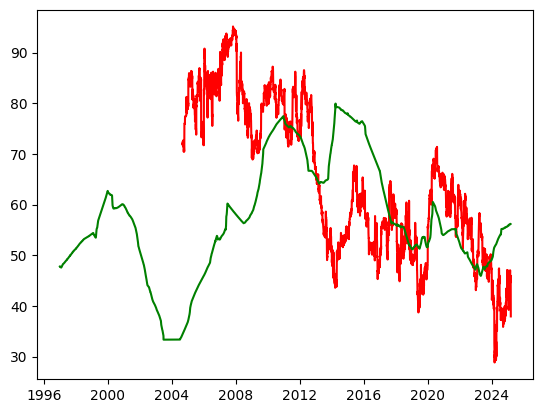

In [5]:
import matplotlib.pyplot as plt

plt.plot(data[('AAPL:NasdaqGS', 'vp_crowding_score')], color='red')
plt.plot(data[('AAPL:NasdaqGS', 'capital_cycle_score')], color='green')